## 图像直方图

图像直方图是图像像素强度分布的图形表示，对于灰度图像，直方图显示了每个灰度级（0到255）在图像中出现的频率，对于彩色图像，我们可以分别计算每个通道（如R、G、B）的直方图

直方图可以帮助我们了解图像的亮度、对比度等信息。例如，如果直方图集中在低灰度区域，说明图像偏暗；如果直方图分布均匀，说明图像对比度较好

- 直方图: 表示图像中像素强度的分布情况，横轴表示像素强度值，纵轴表示该强度值的像素数量。
- 灰度直方图: 针对灰度图像的直方图，表示每个灰度级的像素数量。
- 颜色直方图: 针对彩色图像的直方图，分别表示每个颜色通道（如 BGR）的像素强度分布。

## 计算图像直方图

`cv2.calcHist()`函数用于计算图像的直方图，显示了每个灰度级别（或颜色通道）中像素的数量

函数原型：

`hist = cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])`

参数说明：

- images: 输入的图像列表，通常是一个包含单通道或多通道图像的列表。例如 [img]。
- channels: 需要计算直方图的通道索引。对于灰度图像，使用 [0]；对于彩色图像，可以使用 [0]、[1]、[2] 分别计算蓝色、绿色和红色通道的直方图。
- mask: 掩码图像。如果指定了掩码，则只计算掩码区域内的像素。如果不需要掩码，可以传入 None。
- histSize: 直方图的 bin 数量。对于灰度图像，通常设置为 [256]，表示将灰度级分为 256 个 bin。
- ranges: 像素值的范围。对于灰度图像，通常设置为 [0, 256]，表示像素值的范围是 0 到 255。
- hist: 输出的直方图数组。
- accumulate: 是否累积直方图。如果设置为 True，则直方图不会被清零，而是在每次调用时累积。

返回值：

- hist: 计算得到的直方图，通常为一个二维数组，其中每个元素表示对应灰度级别的像素数量

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from my_function import imshow

In [3]:
def show_gray_hist(gray):
    """
    显示灰度图像的直方图
    传入参数gray为灰度图像
    """
    hist=cv2.calcHist(gray,[0],None,[256],[0,256])
    plt.figure(figsize=[4,3])
    plt.plot(hist, color='black')
    plt.title('Grayscale Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.grid(True)
    plt.show()

def show_color_hist(img):
    """
    显示彩色图像的直方图
    传入参数img为彩色图像
    """
    colors = ('b', 'g', 'r')
    plt.figure(figsize=[4,3])
    for i, color in enumerate(colors):
        hist = cv2.calcHist(img, [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
    plt.title('Color Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.grid(True)
    plt.show()

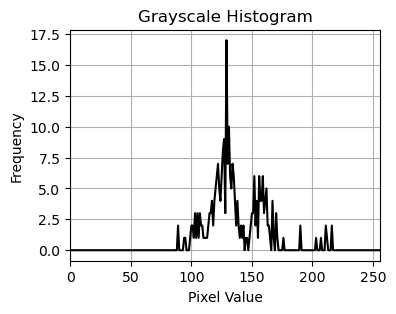

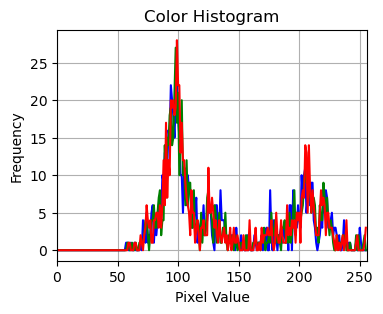

In [6]:
img=cv2.imread("./images/lena.png")
gray=cv2.imread("./images/lena.png",cv2.IMREAD_GRAYSCALE)

show_gray_hist(gray)
show_color_hist(img)

## 直方图均衡化

直方图均衡化是一种增强图像对比度的技术，通过重新分配图像的灰度级别，使得图像的直方图更加均匀分布，从而提升图像的视觉效果。OpenCV 提供了 `cv2.equalizeHist()` 函数来实现这一功能。

函数原型：

`equalized_img = cv2.equalizeHist(src)`

参数说明：

- src: 输入的单通道灰度图像

返回值：

- equalized_img: 输出的均衡化后的图像

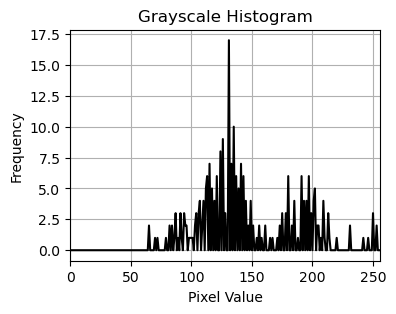

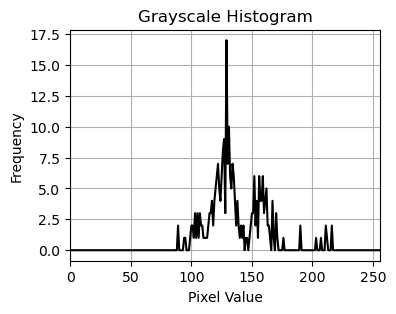

In [7]:
equalized_gray=cv2.equalizeHist(gray)
imshow(original_gray=gray,equalized_gray=equalized_gray)
show_gray_hist(equalized_gray)
show_gray_hist(gray)

## 直方图比较

`cv2.compareHist()`函数用于比较两个直方图之间的相似度，常用于图像检索和匹配等应用中

函数原型：

`result = cv2.compareHist(hist1, hist2, method)`

参数说明：

- hist1: 第一个直方图
- hist2: 第二个直方图
- method: 比较方法，可以是以下几种之一：
  - cv2.HISTCMP_CORREL: 相关性比较
  - cv2.HISTCMP_CHISQR: 卡方比较
  - cv2.HISTCMP_INTERSECT: 交集比较
  - cv2.HISTCMP_BHATTACHARYYA: 巴氏距离比较

返回值：

- result: 比较结果，根据所选方法返回一个数值，表示两个直方图的相似度

In [8]:
hist1=cv2.calcHist(equalized_gray,[0],None,[256],[0,256])
hist2=cv2.calcHist(gray,[0],None,[256],[0,256])

result = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
print("直方图相关性比较结果:", result)  # 结果越接近 1，表示直方图越相似

直方图相关性比较结果: 0.3300716969009355
